In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reshape the data as a matrix
def get_data(dataset, N, M):
	data = np.zeros((N, M))
	with open(dataset) as f:
		for line in f:
			user, item, record, timestamp = line.split()
			data[int(user)-1][int(item)-1] = float(record)
	return data

In [3]:
# loss
def error_calculation(R_origin, P, Q, N, M, K, beta):
	error = 0.0
	for i in range(N):
		for j in range(M):
			if R_origin[i][j]>0:
				error += pow(R_origin[i][j] - np.dot(P[i,:], Q[:,j]), 2)
				for k in range(K):
					error += (beta/2)*(pow(P[i][k], 2) + pow(Q[k][j], 2))
	error = np.sqrt(error / len(R_origin[R_origin!=0]))
	return error

In [4]:
# mean absolute error
def MAE(R_origin, P, Q, N, M, K, beta):
	error = 0.0
	for i in range(N):
		for j in range(M):
			if R_origin[i][j]>0:
				error += np.abs(R_origin[i][j] - np.dot(P[i,:], Q[:,j]))
	error = error / len(R_origin[R_origin!=0])
	return error

In [5]:
def matrix_factorization(R, P, Q, N, M, K, R_test, epochs, alpha, beta):
	train_error_list = []
	test_error_list = []

	# calculate the training error
	train_error = MAE(R, P, Q, N, M, K, beta)
	train_error_list.append(train_error)

	# calculate the testing error
	test_error = MAE(R_test, P, Q, N, M, K, beta)
	test_error_list.append(test_error)

	print("epoch[0][%s] training error: %.4f, testing error: %.4f"\
		%(epochs, train_error, test_error))

	for epoch in range(epochs):
		for i in range(N):
			for j in range(M):
				if R[i][j]>0:
					eij = R[i][j] - np.dot(P[i,:], Q[:,j])
					for k in range(K):
						P[i][k] = P[i][k]+alpha*(2*eij*Q[k][j]-beta*P[i][k])
						Q[k][j] = Q[k][j]+alpha*(2*eij*P[i][k]-beta*Q[k][j])

		# calculate the training error
		train_error = MAE(R, P, Q, N, M, K, beta)
		train_error_list.append(train_error)

		# calculate the testing error
		test_error = MAE(R_test, P, Q, N, M, K, beta)
		test_error_list.append(test_error)

		print("epoch[%s][%s] training error: %.4f, testing error: %.4f"\
			%(epoch+1, epochs, train_error, test_error))

	return train_error_list, test_error_list, P, Q

In [6]:
def plot_loss(training_loss, testing_loss):
    x = np.array(range(1, len(training_loss)+1))
    plt.figure()
    plt.plot(x, np.array(training_loss), label="Training Error")
    plt.plot(x, np.array(testing_loss), label="Validation Error")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Experiment")
    plt.grid()
    plt.legend()
    plt.show()

In [7]:
# the main function
def main():
	# hpyer-parameter K is always from 10 to 100
	N = 943
	M = 1682
	K = 5

	epochs = 100
	alpha = 0.002
	beta = 0.02

	# get data
	training_data = get_data(dataset='./u1.base', N=N, M=M)
	testing_data = get_data(dataset='./u1.test', N=N, M=M)

	# initialize matrix P and Q
	P = np.random.rand(N, K)
	Q = np.random.rand(K, M)

	train_error_list, test_error_list, P, Q = matrix_factorization(R=training_data,\
		P=P, Q=Q, N=N, M=M, K=K, R_test=testing_data, epochs=epochs, alpha=alpha, \
		beta=beta)

	plot_loss(train_error_list, test_error_list)


epoch[0][100] training error: 2.3142, testing error: 2.3201
epoch[1][100] training error: 1.0104, testing error: 1.0706
epoch[2][100] training error: 0.8190, testing error: 0.8772
epoch[3][100] training error: 0.7765, testing error: 0.8260
epoch[4][100] training error: 0.7569, testing error: 0.8020
epoch[5][100] training error: 0.7459, testing error: 0.7891
epoch[6][100] training error: 0.7389, testing error: 0.7814
epoch[7][100] training error: 0.7341, testing error: 0.7765
epoch[8][100] training error: 0.7305, testing error: 0.7731
epoch[9][100] training error: 0.7277, testing error: 0.7706
epoch[10][100] training error: 0.7254, testing error: 0.7688
epoch[11][100] training error: 0.7234, testing error: 0.7675
epoch[12][100] training error: 0.7216, testing error: 0.7665
epoch[13][100] training error: 0.7200, testing error: 0.7657
epoch[14][100] training error: 0.7185, testing error: 0.7652
epoch[15][100] training error: 0.7171, testing error: 0.7647
epoch[16][100] training error: 0.7

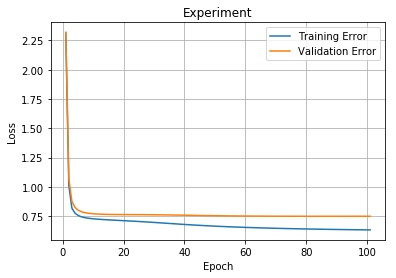

In [8]:
if __name__ == '__main__':
	main()